## Exploratory data analysis file pre-modelling

#### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#### read cleaned data frame

In [2]:
df = pd.read_feather('../data/processed/clean_ft_table')

In [3]:
df_features = df.copy()

In [4]:
df_features.drop(['hadm_id','endtime'],axis=1,inplace=True)

In [5]:
df_features

,time_on_vent,re_intub_class,gender,admission_type,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,25.983333,0,F,EW EMER.,72,19.0,79.0,3.718759,123.2,62.0,0.000000,1.971222,59.921260,387.0,36.444444,20.347548,100.0
1,17.000000,0,M,EW EMER.,23,33.0,122.0,3.577709,264.0,101.0,1.788854,13.771952,70.933071,527.0,39.166667,6.350853,96.0
2,580.233333,0,F,EW EMER.,81,24.0,63.0,1.788854,198.0,79.0,1.673320,4.324350,61.905512,437.0,36.833333,6.418723,96.0
3,170.000000,0,F,URGENT,65,15.0,80.0,2.316607,205.9,105.0,0.577350,3.633180,61.905512,614.0,37.333333,4.505552,100.0
4,83.866667,0,F,EW EMER.,61,18.0,73.0,8.455767,199.5,87.0,0.000000,7.694154,66.070866,556.0,36.444444,7.366591,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7838,134.333333,1,F,EW EMER.,68,15.0,108.0,10.264556,77.4,88.0,2.699206,8.264381,59.921260,320.0,37.611111,13.441230,96.0
7839,14.783333,1,M,EW EMER.,65,22.0,75.0,2.326094,189.2,84.0,0.000000,3.352327,70.039370,498.0,37.722222,5.902481,100.0
7840,73.466667,1,F,DIRECT EMER.,65,13.0,94.0,1.863525,139.0,64.5,1.354006,2.321398,61.011811,519.0,37.055556,3.761299,96.0
7841,218.083333,1,F,EW EMER.,53,17.0,80.0,1.772811,160.6,71.0,0.000000,2.483277,64.086614,308.0,36.888889,12.378938,100.0


In [6]:
from scipy.stats import shapiro, normaltest

In [7]:
df_continuous = df_features.copy()

In [8]:
df_continuous.drop(['re_intub_class','gender','admission_type'],axis=1,inplace=True)

In [9]:
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,25.983333,72,19.0,79.0,3.718759,123.2,62.0,0.000000,1.971222,59.921260,387.0,36.444444,20.347548,100.0
1,17.000000,23,33.0,122.0,3.577709,264.0,101.0,1.788854,13.771952,70.933071,527.0,39.166667,6.350853,96.0
2,580.233333,81,24.0,63.0,1.788854,198.0,79.0,1.673320,4.324350,61.905512,437.0,36.833333,6.418723,96.0
3,170.000000,65,15.0,80.0,2.316607,205.9,105.0,0.577350,3.633180,61.905512,614.0,37.333333,4.505552,100.0
4,83.866667,61,18.0,73.0,8.455767,199.5,87.0,0.000000,7.694154,66.070866,556.0,36.444444,7.366591,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7838,134.333333,68,15.0,108.0,10.264556,77.4,88.0,2.699206,8.264381,59.921260,320.0,37.611111,13.441230,96.0
7839,14.783333,65,22.0,75.0,2.326094,189.2,84.0,0.000000,3.352327,70.039370,498.0,37.722222,5.902481,100.0
7840,73.466667,65,13.0,94.0,1.863525,139.0,64.5,1.354006,2.321398,61.011811,519.0,37.055556,3.761299,96.0
7841,218.083333,53,17.0,80.0,1.772811,160.6,71.0,0.000000,2.483277,64.086614,308.0,36.888889,12.378938,100.0


In [10]:
df_continuous.apply(normaltest)

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,7159.384084,3.031121e+02,1.157806e+03,2.313789e+02,16838.809248,2395.136836,3398.462187,14255.62298,30035.755852,3558.790218,1439.69231,17355.734882,12705.702622,11520.341646
1,0.000000,1.513683e-66,3.850784e-252,5.710946e-51,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [11]:
df_continuous.apply(shapiro)

/home/anne_717/anaconda3/envs/extumate/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,0.631766,9.744070e-01,9.718596e-01,9.888880e-01,0.520215,0.920027,0.927671,0.483599,0.003061,0.724701,9.496035e-01,0.212929,0.506537,0.664346
1,0.000000,3.152452e-35,1.333920e-36,2.476754e-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.401298e-45,0.000000,0.000000,0.000000


#### importantly, no columns appear to be normally distributed using either normality test

<AxesSubplot:xlabel='pulseox', ylabel='Count'>

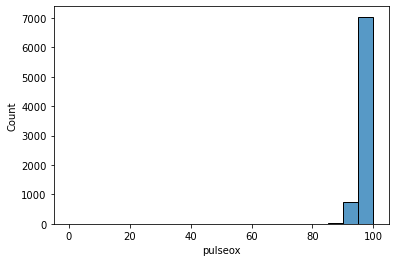

In [12]:
sns.histplot(df_features['pulseox'], bins = 20)

#### Remove outliers by removing all values with a zscore +/- 4

In [13]:
summary_stats = df_continuous.describe()

In [14]:
summary_stats

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
count,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000
mean,99.138637,61.775469,19.299545,86.007905,4.430931,184.772222,81.983998,1.151908,10.660796,66.505545,477.137690,36.993517,8.841170,97.680989
std,135.714359,16.563556,5.873621,17.405963,3.659306,54.994794,16.186366,1.402790,396.485962,5.577184,147.390319,1.685076,8.171483,2.879583
min,6.016667,18.000000,0.000000,0.000000,0.000000,56.000000,3.000000,0.000000,0.000000,0.000000,101.000000,-17.777778,0.000000,0.000000
25%,20.066667,52.000000,15.000000,74.000000,2.436494,147.800000,71.000000,0.516398,3.286335,64.086614,380.000000,36.722222,5.006662,96.000000
50%,50.916667,63.000000,19.000000,85.000000,3.777124,176.000000,80.000000,0.951190,5.125102,66.964567,456.000000,37.000000,7.280110,98.000000
75%,125.858333,74.000000,23.000000,97.000000,5.952190,212.500000,91.000000,1.516575,7.822220,70.039370,550.000000,37.388889,10.518766,100.000000
max,2389.733333,91.000000,82.000000,173.000000,160.603722,605.000000,314.000000,42.949971,35117.028773,175.098425,1602.000000,40.000000,296.433466,100.000000


In [15]:
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,25.983333,72,19.0,79.0,3.718759,123.2,62.0,0.000000,1.971222,59.921260,387.0,36.444444,20.347548,100.0
1,17.000000,23,33.0,122.0,3.577709,264.0,101.0,1.788854,13.771952,70.933071,527.0,39.166667,6.350853,96.0
2,580.233333,81,24.0,63.0,1.788854,198.0,79.0,1.673320,4.324350,61.905512,437.0,36.833333,6.418723,96.0
3,170.000000,65,15.0,80.0,2.316607,205.9,105.0,0.577350,3.633180,61.905512,614.0,37.333333,4.505552,100.0
4,83.866667,61,18.0,73.0,8.455767,199.5,87.0,0.000000,7.694154,66.070866,556.0,36.444444,7.366591,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7838,134.333333,68,15.0,108.0,10.264556,77.4,88.0,2.699206,8.264381,59.921260,320.0,37.611111,13.441230,96.0
7839,14.783333,65,22.0,75.0,2.326094,189.2,84.0,0.000000,3.352327,70.039370,498.0,37.722222,5.902481,100.0
7840,73.466667,65,13.0,94.0,1.863525,139.0,64.5,1.354006,2.321398,61.011811,519.0,37.055556,3.761299,96.0
7841,218.083333,53,17.0,80.0,1.772811,160.6,71.0,0.000000,2.483277,64.086614,308.0,36.888889,12.378938,100.0


In [16]:
cols = list(df_continuous.columns)
df_new = df_continuous.copy()
for col in cols:
    df_new[col] = (df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()

In [17]:
for col in cols:
    df_continuous[col] = np.where(((df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()>4)|
                                  ((df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()<-4),
                                  np.NaN,df_continuous[col])

In [18]:
df_continuous.isnull().sum()

time_on_vent         78
anchor_age            0
spontrr              13
heartrate            10
std_spontrr           8
weight               40
bloodpressure        22
std_pulseox          38
std_heartrate         1
height               36
tidalvolume          16
temp                 14
std_bloodpressure    60
pulseox              24
dtype: int64

In [19]:
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,25.983333,72.0,19.0,79.0,3.718759,123.2,62.0,0.000000,1.971222,59.921260,387.0,36.444444,20.347548,100.0
1,17.000000,23.0,33.0,122.0,3.577709,264.0,101.0,1.788854,13.771952,70.933071,527.0,39.166667,6.350853,96.0
2,580.233333,81.0,24.0,63.0,1.788854,198.0,79.0,1.673320,4.324350,61.905512,437.0,36.833333,6.418723,96.0
3,170.000000,65.0,15.0,80.0,2.316607,205.9,105.0,0.577350,3.633180,61.905512,614.0,37.333333,4.505552,100.0
4,83.866667,61.0,18.0,73.0,8.455767,199.5,87.0,0.000000,7.694154,66.070866,556.0,36.444444,7.366591,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7838,134.333333,68.0,15.0,108.0,10.264556,77.4,88.0,2.699206,8.264381,59.921260,320.0,37.611111,13.441230,96.0
7839,14.783333,65.0,22.0,75.0,2.326094,189.2,84.0,0.000000,3.352327,70.039370,498.0,37.722222,5.902481,100.0
7840,73.466667,65.0,13.0,94.0,1.863525,139.0,64.5,1.354006,2.321398,61.011811,519.0,37.055556,3.761299,96.0
7841,218.083333,53.0,17.0,80.0,1.772811,160.6,71.0,0.000000,2.483277,64.086614,308.0,36.888889,12.378938,100.0


In [20]:
df_continuous.dropna(inplace=True)

In [21]:
df_continuous.apply(normaltest)

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,3105.681603,2.947640e+02,1.613647e+02,1.938599e+02,8.322378e+02,9.141995e+02,5.729719e+02,1777.587581,3360.630149,6.904955e+01,7.978781e+02,5.149220e+02,2597.612701,1.114084e+03
1,0.000000,9.835791e-65,9.122217e-36,8.014218e-43,1.913592e-181,3.048615e-199,3.808236e-125,0.000000,0.000000,1.014101e-15,5.533146e-174,1.535019e-112,0.000000,1.201747e-242


In [22]:
df_continuous.apply(shapiro)

/home/anne_717/anaconda3/envs/extumate/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,0.755132,9.738056e-01,9.890497e-01,9.901050e-01,0.938064,9.594640e-01,9.733403e-01,0.914441,0.847904,9.860680e-01,9.620907e-01,9.717481e-01,0.880533,0.866577
1,0.000000,6.071535e-35,1.142141e-23,1.651494e-22,0.000000,1.860084e-41,3.403289e-35,0.000000,0.000000,1.498657e-26,2.026179e-40,4.975939e-36,0.000000,0.000000


In [23]:
df_categorical = df_features.copy()
df_categorical = df_features[['re_intub_class','gender','admission_type']]

In [24]:
df_to_model = pd.merge(left = df_continuous, right=df_categorical, how = 'inner',left_index = True, right_index = True)

In [25]:
df_to_model.reset_index(inplace=True)
df_to_model.drop('index',axis=1,inplace=True)

<AxesSubplot:>

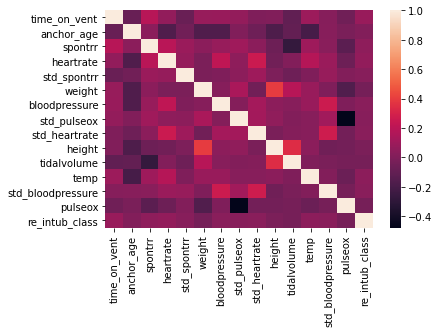

In [26]:
sns.heatmap(df_to_model.corr())

In [27]:
from scipy.stats import boxcox

<AxesSubplot:xlabel='time_on_vent', ylabel='Count'>

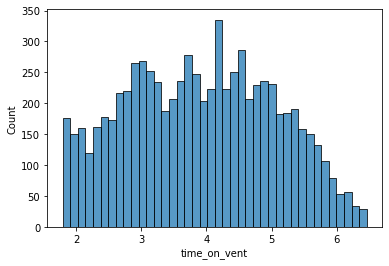

In [28]:
sns.histplot(np.log(df_continuous['time_on_vent']), bins = 40)

<AxesSubplot:xlabel='tidalvolume', ylabel='Count'>

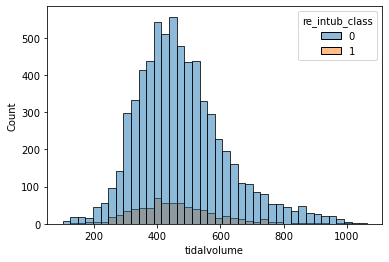

In [29]:
sns.histplot(df_to_model, x = 'tidalvolume', hue = 're_intub_class', bins = 40)

In [30]:
df_to_model.describe()

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox,re_intub_class
count,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000
mean,90.607371,61.900586,19.216751,85.861192,4.345149,182.965723,81.700759,1.084004,6.150636,66.610143,475.806944,37.060632,8.277360,97.763774,0.096620
std,104.049101,16.577086,5.652373,17.149681,2.472594,50.546906,15.057642,0.836579,4.323245,4.139669,143.503451,0.576123,4.787391,2.292520,0.295459
min,6.016667,18.000000,0.000000,37.000000,0.000000,56.000000,36.000000,0.000000,0.000000,46.031496,101.000000,33.777778,0.000000,87.000000,0.000000
25%,19.883333,52.000000,15.000000,74.000000,2.429470,147.400000,71.000000,0.516398,3.271085,64.086614,379.000000,36.722222,4.966555,96.000000,0.000000
50%,49.750000,63.000000,19.000000,85.000000,3.757400,176.000000,80.000000,0.932837,5.115336,66.964567,455.000000,37.000000,7.211488,98.000000,0.000000
75%,120.970833,74.000000,23.000000,97.000000,5.936168,211.200000,90.375000,1.505545,7.819676,70.039370,550.000000,37.388889,10.353743,100.000000,0.000000
max,640.166667,91.000000,42.000000,155.000000,16.694310,403.900000,146.000000,6.550173,41.993452,81.944882,1063.000000,40.000000,41.287609,100.000000,1.000000


In [31]:
#df_continuous.reset_index(inplace=True)
#df_continuous.drop('index',axis=1,inplace=True)
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,bloodpressure,std_pulseox,std_heartrate,height,tidalvolume,temp,std_bloodpressure,pulseox
0,25.983333,72.0,19.0,79.0,3.718759,123.2,62.0,0.000000,1.971222,59.921260,387.0,36.444444,20.347548,100.0
1,17.000000,23.0,33.0,122.0,3.577709,264.0,101.0,1.788854,13.771952,70.933071,527.0,39.166667,6.350853,96.0
2,580.233333,81.0,24.0,63.0,1.788854,198.0,79.0,1.673320,4.324350,61.905512,437.0,36.833333,6.418723,96.0
3,170.000000,65.0,15.0,80.0,2.316607,205.9,105.0,0.577350,3.633180,61.905512,614.0,37.333333,4.505552,100.0
4,83.866667,61.0,18.0,73.0,8.455767,199.5,87.0,0.000000,7.694154,66.070866,556.0,36.444444,7.366591,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,10.416667,85.0,15.0,71.0,1.870829,139.5,69.0,0.755929,11.250397,66.964567,498.0,36.888889,3.817254,100.0
7838,134.333333,68.0,15.0,108.0,10.264556,77.4,88.0,2.699206,8.264381,59.921260,320.0,37.611111,13.441230,96.0
7839,14.783333,65.0,22.0,75.0,2.326094,189.2,84.0,0.000000,3.352327,70.039370,498.0,37.722222,5.902481,100.0
7840,73.466667,65.0,13.0,94.0,1.863525,139.0,64.5,1.354006,2.321398,61.011811,519.0,37.055556,3.761299,96.0


In [32]:
df_to_model.to_feather('../data/processed/df_to_model')